In [80]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [82]:
train.columns
train=train.drop(['Unnamed: 0', 'id'], axis=1)
test=test.drop(['Unnamed: 0', 'id'], axis=1)
data=pd.concat([train, test], axis=0)

In [83]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [84]:
data['Gender'].unique()
data['Gender']=data['Gender'].replace({'Male': 0, 'Female':1})

In [85]:
data['Customer Type'].unique()
data['Customer Type']=data['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer':1})

In [86]:
data["Type of Travel"].unique()
data['Type of Travel']=data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1})

In [87]:
data['Class'].unique()
data['Class']=data['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2})

In [88]:
print(data.head(),data['satisfaction'].unique())

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              0   13               0      1              460   
1       0              1   25               1      2              235   
2       1              0   26               1      2             1142   
3       1              0   25               1      2              562   
4       0              0   61               1      2              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3           

In [89]:
missing=data.isnull()
missing_per_col=missing.sum()
print(missing_per_col)


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [90]:
print((data['Arrival Delay in Minutes']==0).sum())
data=data.dropna()

72753


In [93]:
X=data.drop(['satisfaction'], axis=1)
y=data['satisfaction']

scale=StandardScaler()
scaledX=scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2)

In [94]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(103589, 22) (25898, 22) (103589,) (25898,)


In [110]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns

## Initial Model with Default Parameters

In [96]:
model1=LogisticRegression(max_iter=100000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

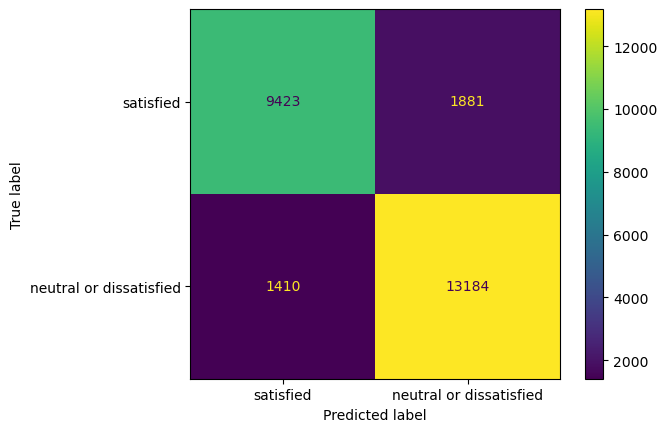

In [112]:
ypred1=model1.predict(X_test)
labels=['satisfied', 'neutral or dissatisfied']
cm1=confusion_matrix(y_test, ypred1, labels=labels)

disp1=ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=labels)
disp1.plot()
plt.show()

In [98]:
model1.report=classification_report(y_test, ypred1)
print(model1.report)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     14594
              satisfied       0.87      0.83      0.85     11304

               accuracy                           0.87     25898
              macro avg       0.87      0.87      0.87     25898
           weighted avg       0.87      0.87      0.87     25898



In [99]:
coefficients1=model1.coef_[0]
features_model1=pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients1)})
print(features_model1)

                              Feature  Importance
0                              Gender    0.037556
1                       Customer Type    0.764077
2                                 Age    0.121830
3                      Type of Travel    1.266467
4                               Class    0.338489
5                     Flight Distance    0.016245
6               Inflight wifi service    0.526984
7   Departure/Arrival time convenient    0.202865
8              Ease of Online booking    0.207332
9                       Gate location    0.032837
10                     Food and drink    0.039919
11                    Online boarding    0.837187
12                       Seat comfort    0.083803
13             Inflight entertainment    0.079359
14                   On-board service    0.399352
15                   Leg room service    0.333986
16                   Baggage handling    0.152334
17                    Checkin service    0.417561
18                   Inflight service    0.143939


## Grid Search for Best Parameters

In [100]:
model=LogisticRegression(max_iter=1000)
param_grid=dict(solver=['lbfgs', 'liblinear','newton-cholesky','sag','newton-cg'],penalty=[None, 'l1', 'l2'], C=[100,10,1.0,0.1,0.01])
cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=5, random_state=1)
grid_search=GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result=grid_search.fit(X_train, y_train)
best_result=grid_result.best_score_
best_params=grid_result.best_params_ 
print("Best score: ", best_result, "Best parameters: ", best_params)

/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gracehyland/anaconda3/lib/python3.10/s

Best score:  0.874486672072251 Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}


## Best Model

In [101]:
model2=LogisticRegression(solver='sag', C=0.01, penalty='l2',max_iter=100000)
model2.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=100000, solver='sag')

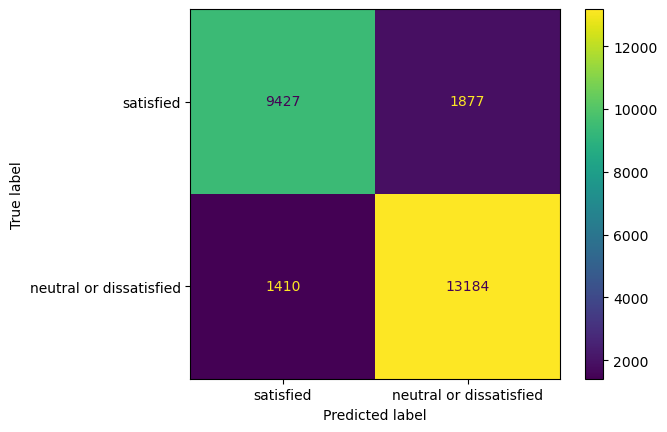

In [113]:
ypred2=model2.predict(X_test)
labels=['satisfied', 'neutral or dissatisfied']
cm2=confusion_matrix(y_test, ypred2, labels=labels)

disp2=ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
disp2.plot()
plt.show()

In [103]:
model2.report=classification_report(y_test, ypred2)
print(model2.report)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     14594
              satisfied       0.87      0.83      0.85     11304

               accuracy                           0.87     25898
              macro avg       0.87      0.87      0.87     25898
           weighted avg       0.87      0.87      0.87     25898



In [118]:
coefficients2=model2.coef_[0]
features_model2=pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients2)})
features_model2=features_model2.sort_values('Importance', ascending=False)
print(features_model2)

                              Feature  Importance
3                      Type of Travel    1.235787
11                    Online boarding    0.823775
1                       Customer Type    0.744052
6               Inflight wifi service    0.516441
17                    Checkin service    0.409551
14                   On-board service    0.390362
4                               Class    0.343924
15                   Leg room service    0.329952
19                        Cleanliness    0.301292
21           Arrival Delay in Minutes    0.282507
7   Departure/Arrival time convenient    0.202326
8              Ease of Online booking    0.194539
16                   Baggage handling    0.149855
18                   Inflight service    0.140740
2                                 Age    0.114423
13             Inflight entertainment    0.090111
20         Departure Delay in Minutes    0.088384
12                       Seat comfort    0.086964
10                     Food and drink    0.038725


<Axes: xlabel='Importance', ylabel='Feature'>

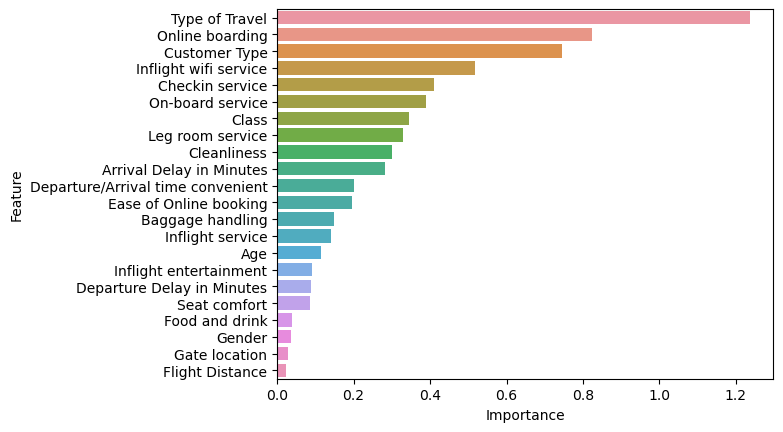

In [119]:
sns.barplot(data=features_model2, x="Importance", y="Feature")